***EDA***

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno


In [27]:
data=pd.read_csv("C:/Users/DELL/Desktop/Train_preprocess.csv")

# Missing values

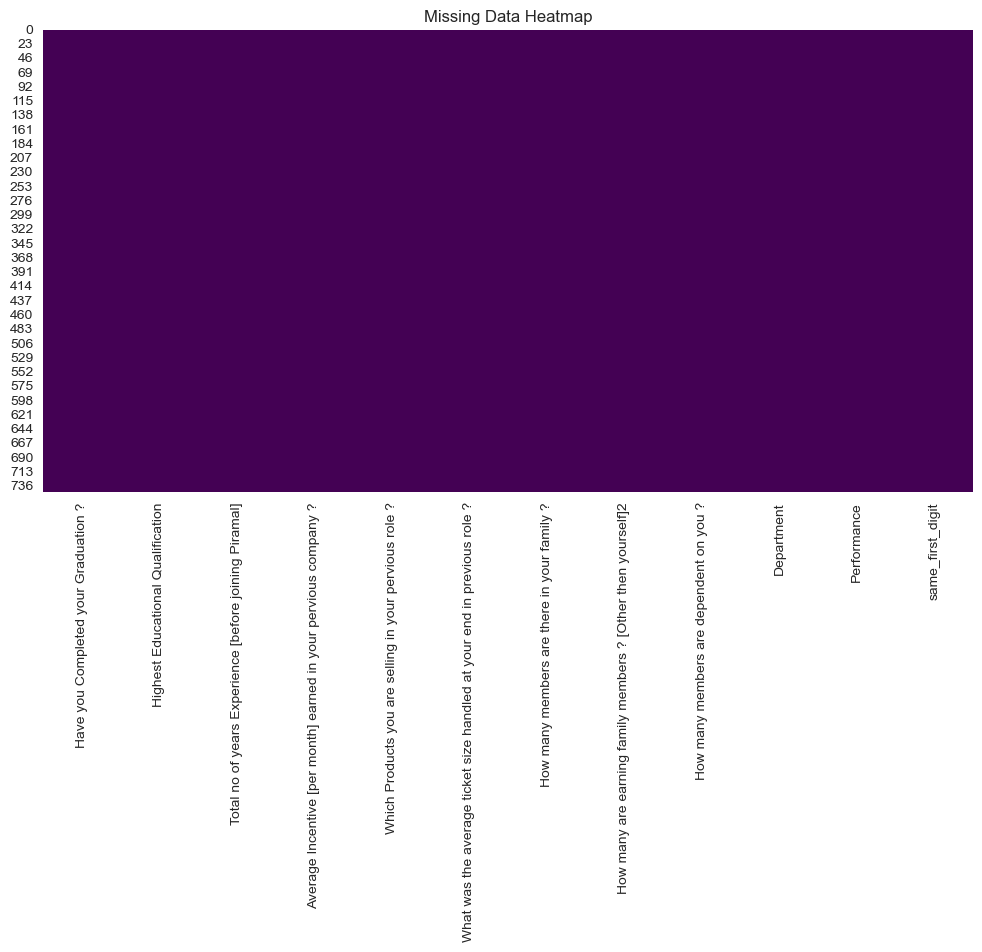

In [58]:
import seaborn as sns

# Create a heatmap to visualize missing data
plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()


*The heatmap for missing values indicates that there are no missing values in the dataset, as all cells are uniformly colored, indicating the absence of nulls.*

# Analysis of Categorical Distributions


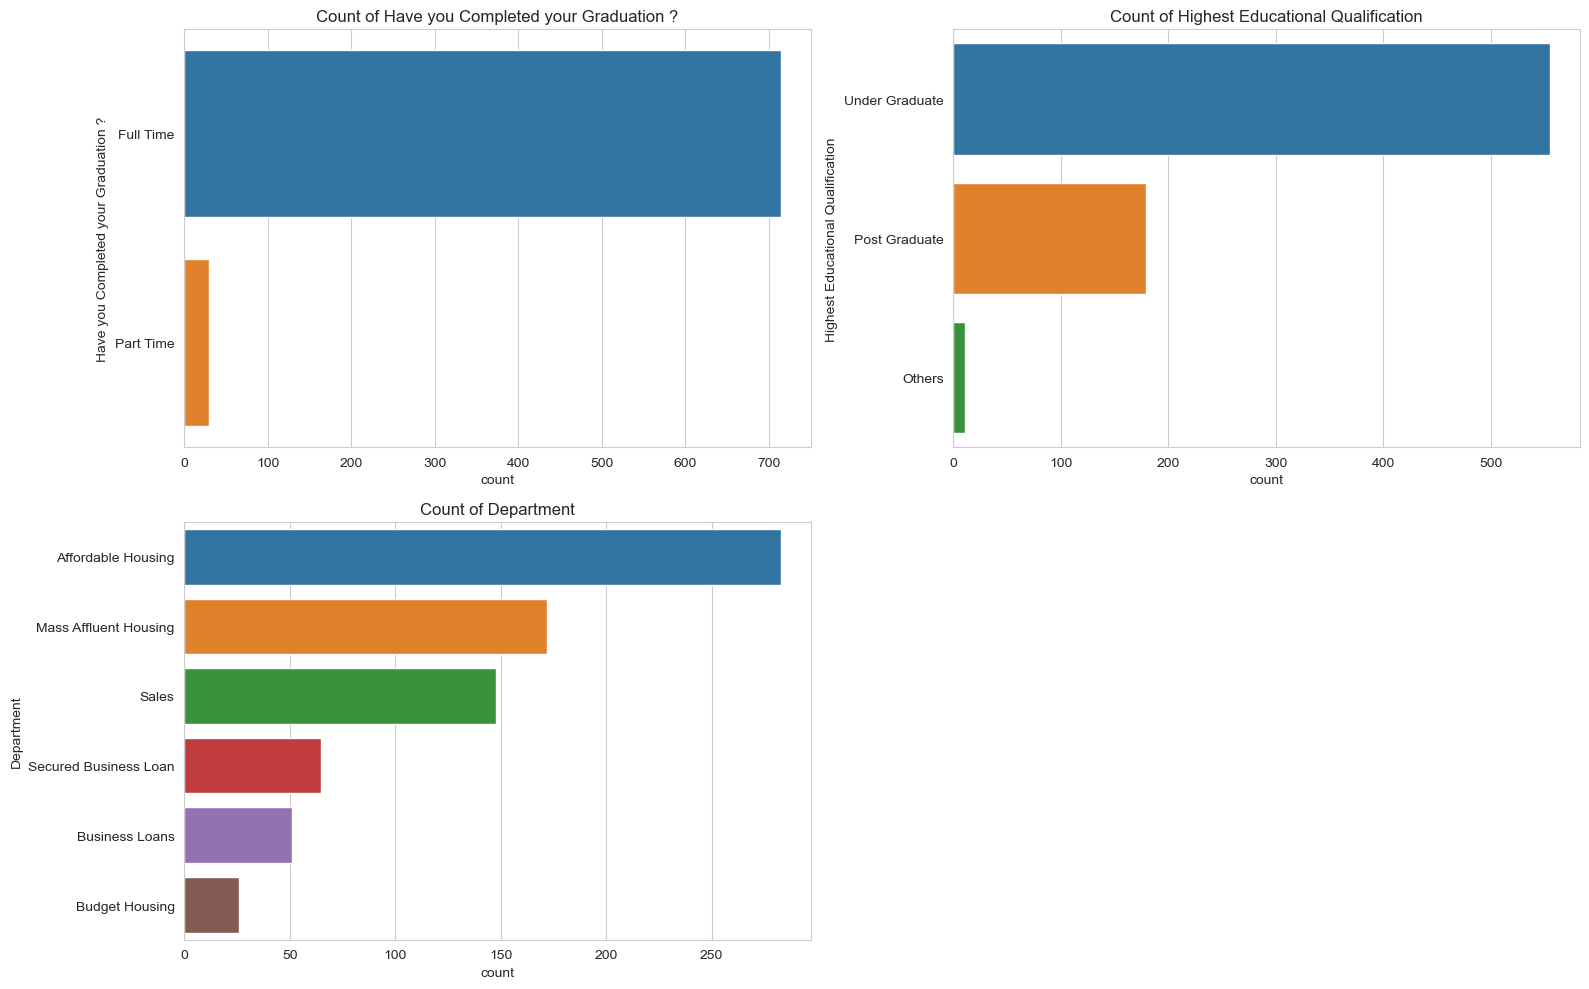

In [61]:
# Selecting categorical columns for bar plots
categorical_cols = ['Have you Completed your Graduation ?', 'Highest Educational Qualification', 'Department']

# Plotting bar plots for categorical columns
plt.figure(figsize=(16, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(y=data[col], order = data[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.tight_layout()
plt.show()


Most candidates have completed their graduation full time, with a smaller proportion have completed with part time

Highest Educational Qualification: There's a variety in educational qualifications, with some levels being more common than others. The plot suggests that most candidates have either a Bachelor's or Master's degree.

Graph (2,1) displays the distribution of candidates across various departments they applied to. Some departments have higher representations than others, highlighting areas with greater interest or demand. This information is valuable for analyzing both candidate preferences and department-specific performance trends.

# Analysis of Numerical Distributions

c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

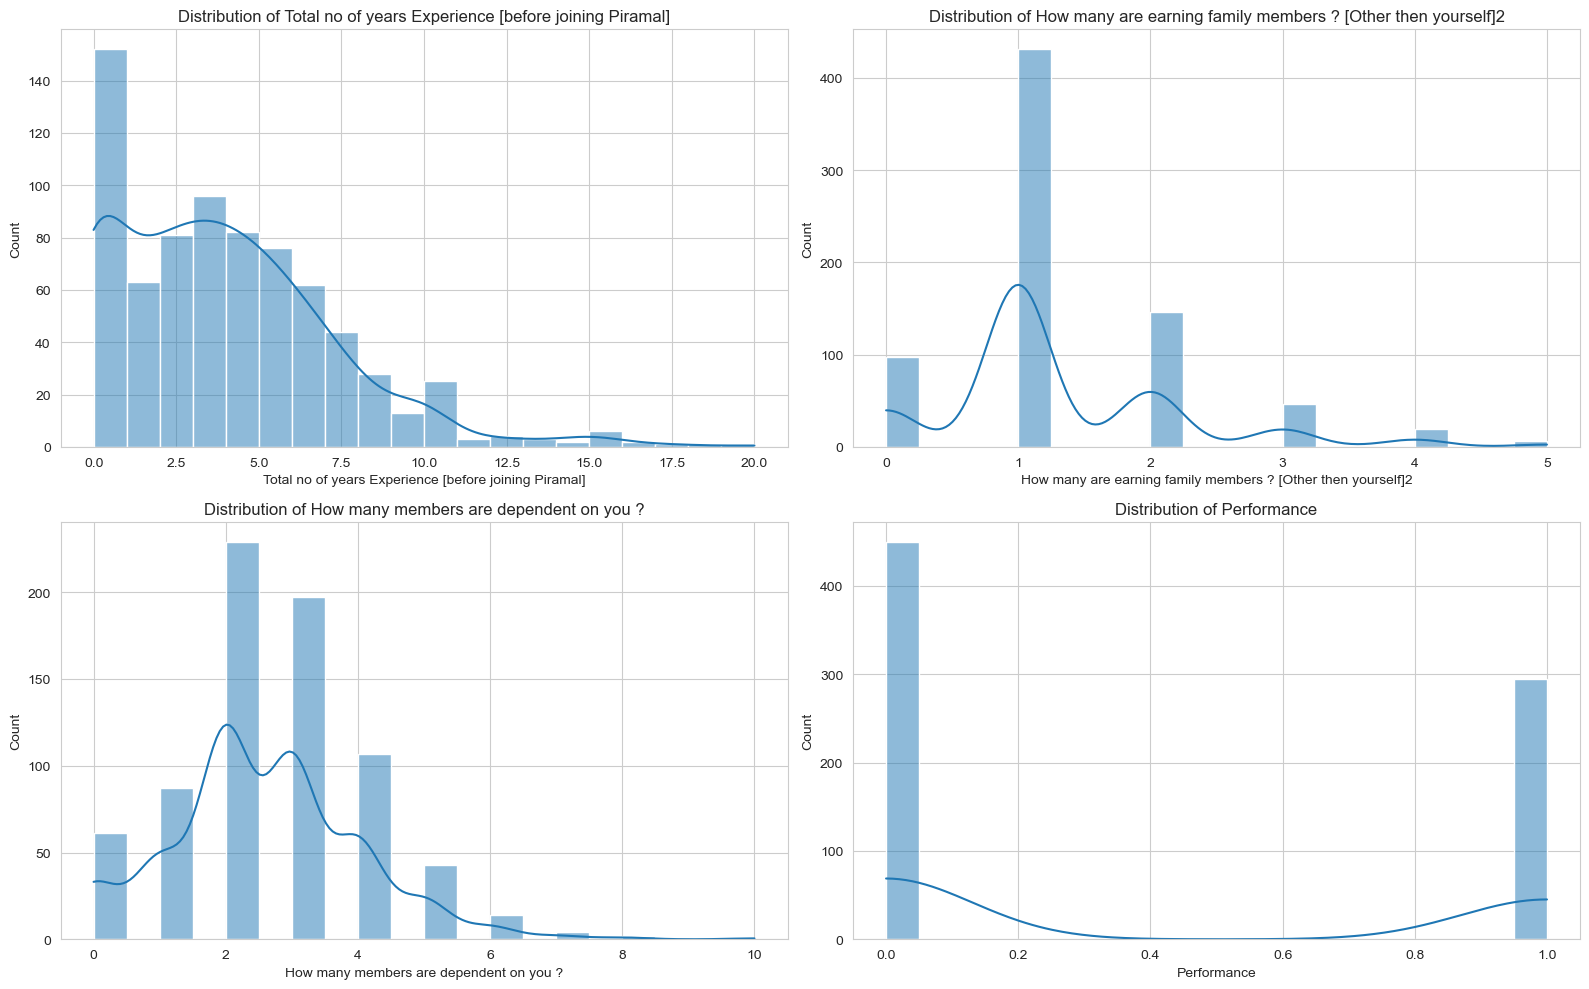

In [62]:
# Selecting numerical columns for histograms
numerical_cols = ['Total no of years Experience [before joining Piramal]', 'How many are earning family members ? [Other then yourself]2', 'How many members are dependent on you ?', 'Performance']

# Plotting histograms for numerical columns
plt.figure(figsize=(16, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


Total no of years Experience [before joining Piramal]: This variable shows a right-skewed distribution, suggesting that most candidates have fewer years of experience, with fewer individuals having long experience.

How many are earning family members? [Other than yourself]: Most candidates report having 0 or 1 other earning family member, with very few having more than that.

How many members are dependent on you? This distribution is slightly right-skewed, indicating that most candidates have few dependents, with the number tapering off as dependency increases.

Performance: It appears to be a binary metric (likely 0 or 1), showing the distribution between two groups.

# Crosstabulation of 'same_first_digit' and 'Performance'

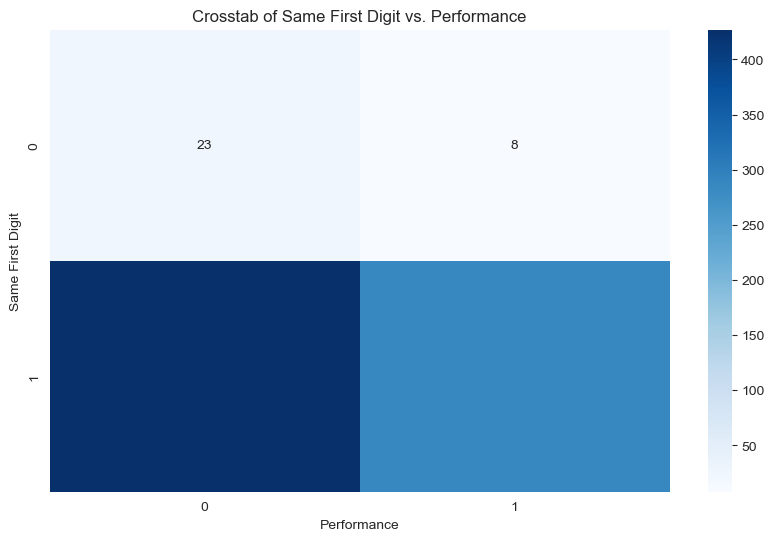

Performance,0,1
same_first_digit,,
0,23,8
1,427,287


In [65]:
performance_digit_crosstab = pd.crosstab(data['same_first_digit'], data['Performance'])

# Visualize the crosstab
plt.figure(figsize=(10, 6))
sns.heatmap(performance_digit_crosstab, annot=True, fmt='d', cmap='Blues')
plt.title('Crosstab of Same First Digit vs. Performance')
plt.ylabel('Same First Digit')
plt.xlabel('Performance')
plt.show()

performance_digit_crosstab


The majority of individuals, whether selected or not, have the 'same_first_digit' as 1. This suggests that having the same first digit is a common characteristic among the majority of the dataset.<br>
There is a considerable number of individuals with 'same_first_digit' as 1 who were selected (Performance = 1). This implies a potentially higher selection rate among those with the same first digit, although the context or reason behind this pattern is unclear without more information about what 'same_first_digit' actually represents.

_________________________________________________________________-----

# Educational Background Diversity within Departments

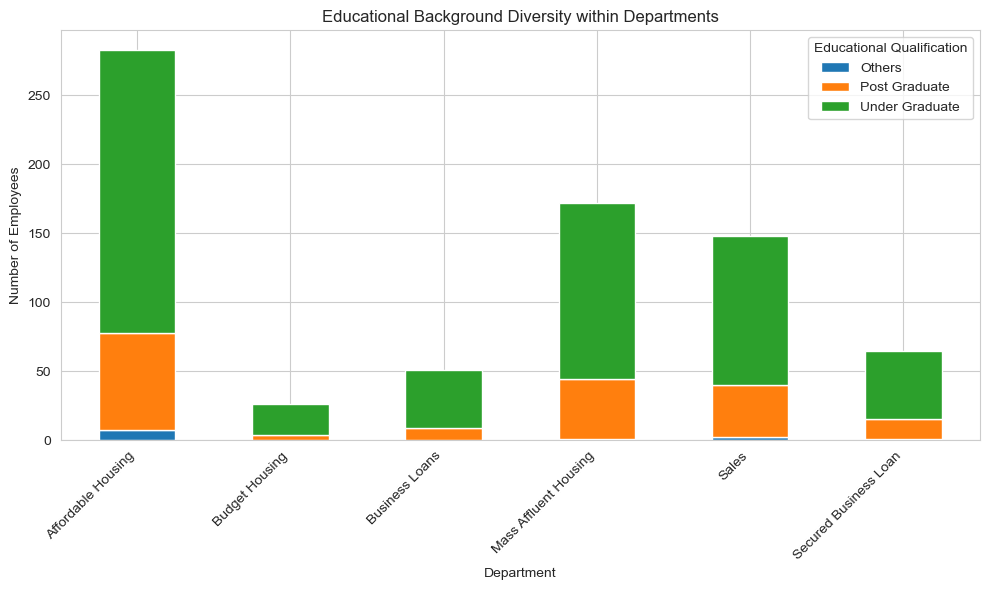

In [72]:
edu_dept_crosstab = pd.crosstab(data['Department'], data['Highest Educational Qualification'])
edu_dept_crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Educational Background Diversity within Departments')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Educational Qualification')

plt.tight_layout()
plt.show()


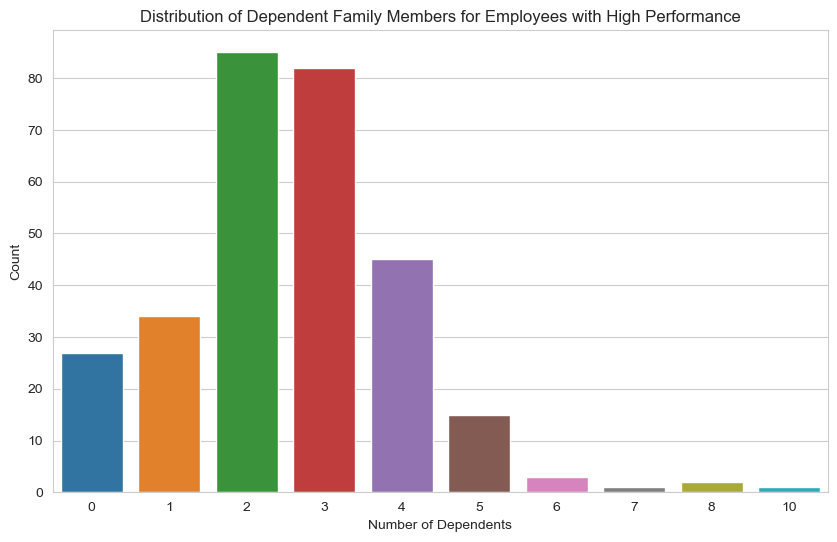

In [73]:
# Filter data for Performance = 1
data_performance_1 = data[data['Performance'] == 1]

# Plotting the distribution of dependents for Performance = 1
plt.figure(figsize=(10, 6))
sns.countplot(x='How many members are dependent on you ?', data=data_performance_1)
plt.title('Distribution of Dependent Family Members for Employees with High Performance')
plt.xlabel('Number of Dependents')
plt.ylabel('Count')
plt.show()


The bar plot above illustrates the distribution of dependent family members among Candidates who are categorized as having high performance (Performance = 1). It shows the frequency of each number of dependents. From the plot, we can observe how many employees with a certain number of dependents achieved a performance level of 1, providing insights into potential patterns or trends related to family responsibilities and job performance